<a href="https://colab.research.google.com/github/ranaehelal/Movie-Review-Sentiment/blob/main/IMDB_Dataset_of_50K_Movie_Reviews_BILSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the dataset

In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
import pandas as pd
import numpy as np

file_path = "/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB Dataset.csv"

df = pd.read_csv(file_path)

print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


# Display basic information about the dataset


In [17]:
df.shape

(50000, 2)

In [18]:
type(df)

pandas.core.frame.DataFrame

In [19]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [20]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


<ipython-input-24-29f4562d3d50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="coolwarm")


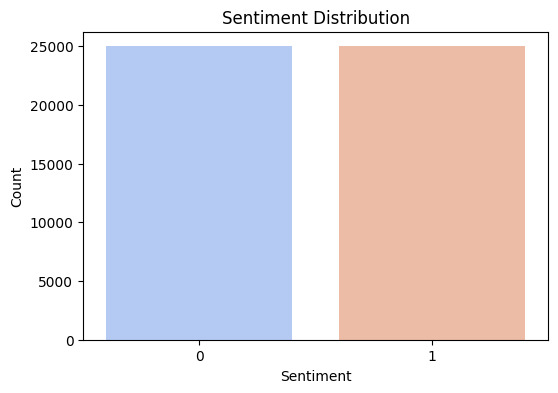

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


## Classification
### Negative = 0
### Positive = 1

In [21]:
df.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)

<ipython-input-21-00b3046a1d3c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)


In [22]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [23]:
df['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


# preprocessing text data

In [28]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 13.4 MB/s eta 0:00:00


In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word to its base by better way than stemming
from bs4 import BeautifulSoup # remove the html
import contractions

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english')) - {"not", "no", "nor", "n't","never"} # words like 'the', 'is', 'in .


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = contractions.fix(text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z!? ]', '', text)
    text = text.lower()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    return text


In [33]:
df['review'] = df['review'].apply(clean_text)


In [34]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter matteis love time money visually stunni...,1


## Create Word clouds


#### Word Clouds for all The Reviews

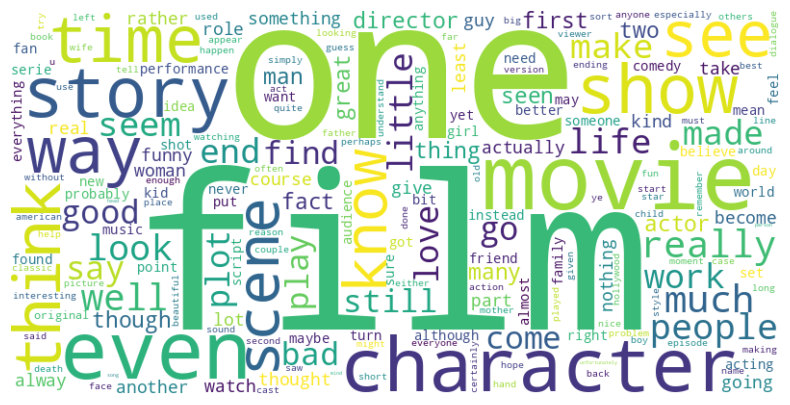

In [35]:
from wordcloud import WordCloud

text = " ".join(review for review in df['review'])


wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#### Word Clouds for Positive Reviews

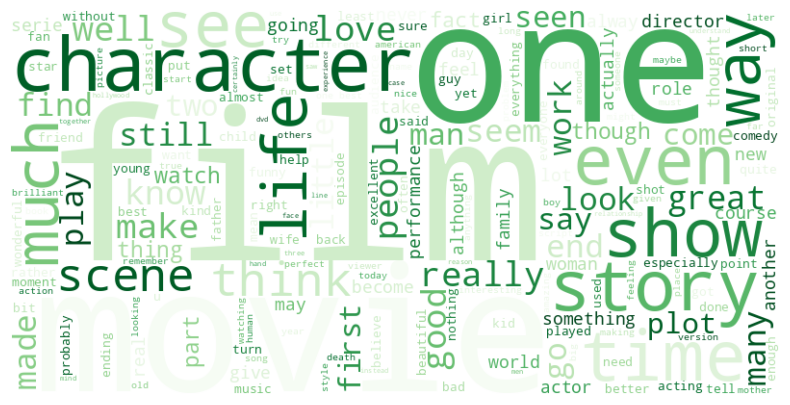

In [36]:
positive_reviews = " ".join(df[df['sentiment'] == 1]['review'])


wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens', max_words=200).generate(positive_reviews)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


####  Word Clouds for negative Reviews

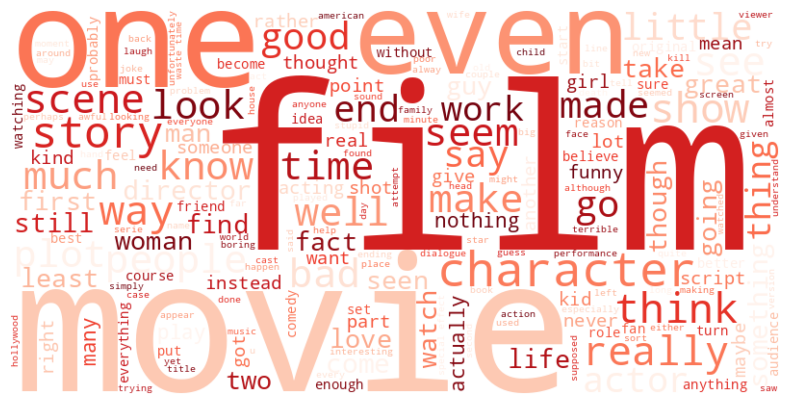

In [37]:
negative_reviews = " ".join(df[df['sentiment'] == 0]['review'])


wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds', max_words=200).generate(negative_reviews)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# LSTM


#### important libraries for the model

In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [42]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>") # most common
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])#to numbers
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post') #if less add 0 more trunc


In [43]:
labels = df['sentiment'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [45]:
X_train

array([[1790,  767,    1, ...,  116,  127, 3499],
       [   2,   35,  312, ...,    0,    0,    0],
       [1172,   36,   14, ...,    0,    0,    0],
       ...,
       [ 696,    5,  273, ...,    0,    0,    0],
       [ 228,   88,  541, ...,    0,    0,    0],
       [ 417,    3,  173, ...,    0,    0,    0]], dtype=int32)

In [46]:
X_test

array([[ 17, 307,   1, ...,   0,   0,   0],
       [  2,  37, 557, ...,   0,   0,   0],
       [  4, 771,  11, ...,   0,   0,   0],
       ...,
       [337,   1,  63, ...,   0,   0,   0],
       [131,   4,  33, ...,   0,   0,   0],
       [114,   1,  49, ...,   0,   0,   0]], dtype=int32)

In [47]:
X_train.shape

(40000, 200)

In [48]:
X_test.shape

(10000, 200)

In [49]:
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [50]:
y_train

array([0, 0, 1, ..., 0, 1, 1])

### build the model

In [71]:
model = Sequential()
# to convert every word into vector
# with 5000 unique word in dictionary
# 128 column for each word
# 200 word in sentence (trunc or add)
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
#drop 20% of neurons
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation="sigmoid"))

In [72]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [73]:
# train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 733s 1s/step - accuracy: 0.7265 - loss: 0.5295 - val_accuracy: 0.8592 - val_loss: 0.3677
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 697s 1s/step - accuracy: 0.8636 - loss: 0.3443 - val_accuracy: 0.8461 - val_loss: 0.4151
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 756s 1s/step - accuracy: 0.8602 - loss: 0.3502 - val_accuracy: 0.8687 - val_loss: 0.3160
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 761s 1s/step - accuracy: 0.8941 - loss: 0.2762 - val_accuracy: 0.8733 - val_loss: 0.3037
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 734s 1s/step - accuracy: 0.9040 - loss: 0.2499 - val_accuracy: 0.8799 - val_loss: 0.2998


# Save The Model

In [74]:
model.save('sentiment_model.h5')


In [75]:
model.save('sentiment_model.keras')

In [77]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("sentiment_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmprh8gm03k'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(64, 200), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(64, 1), dtype=tf.float32, name=None)
Captures:
  138276168059600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138276168065360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138276174579280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138276174584272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138276174581008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138276168064784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138276174581200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138276174581968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138276174585040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138276459249744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138276459250896: TensorS

# Evaluate the model

### accuracy and loss

In [78]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Loss: 0.2998
Accuracy: 0.8799


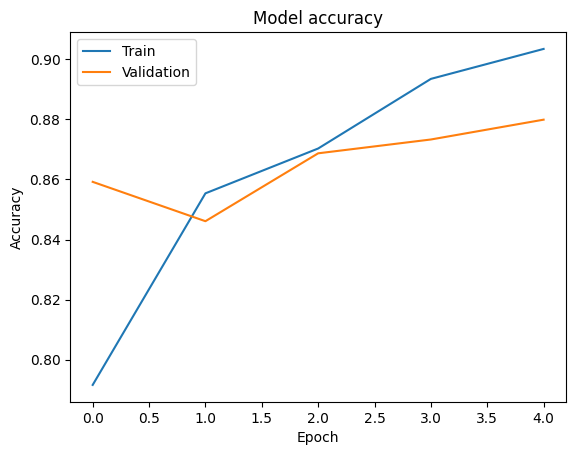

In [79]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

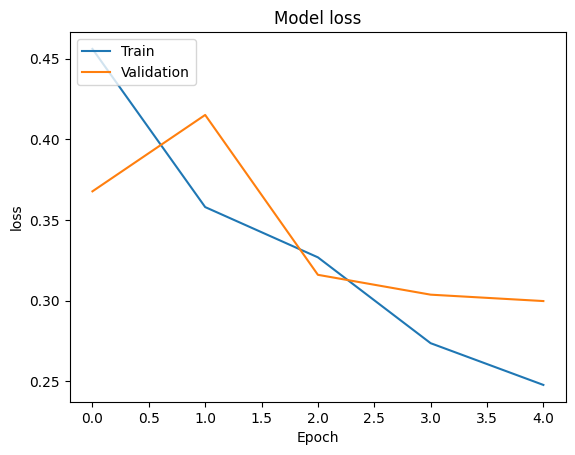

In [80]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Classification Report

In [82]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

y_pred_labels = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_labels, target_names=["Negative", "Positive"]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 148ms/step
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      4961
    Positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Confusion Matrix

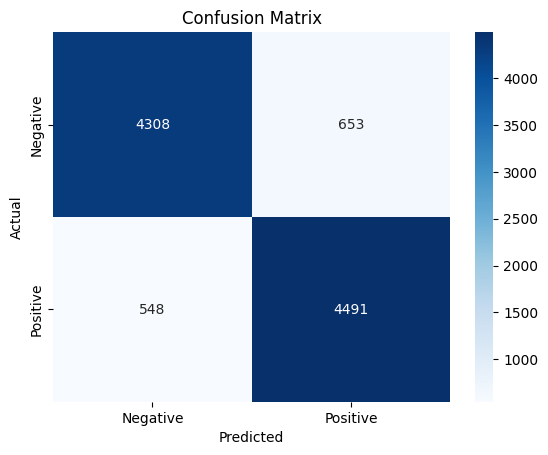

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Building Predictive System


In [84]:
def predict_sentiment(text):
  sequence = tokenizer.texts_to_sequences([text])
  padded_sequence = pad_sequences(sequence, maxlen=200, padding='post')
  prediction = model.predict(padded_sequence)
  sentiment_score = float(prediction[0][0])
  sentiment_label = "Positive" if sentiment_score > 0.5 else "Negative"
  return {"label": sentiment_label, "score": sentiment_score}


## Test the model

In [85]:
text = "This movie was fantastic!"
predicted_sentiment = predict_sentiment(text)
print(f"Predicted sentiment for '{text}': {predicted_sentiment}")


text = "This movie was terrible!"
predicted_sentiment = predict_sentiment(text)
print(f"Predicted sentiment for '{text}': {predicted_sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted sentiment for 'This movie was fantastic!': {'label': 'Positive', 'score': 0.7960482239723206}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted sentiment for 'This movie was terrible!': {'label': 'Negative', 'score': 0.1387789249420166}


In [86]:

text =  "It was an average experience, nothing special."

predicted_sentiment = predict_sentiment(text)
print(f"Predicted sentiment for '{text}': {predicted_sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted sentiment for 'It was an average experience, nothing special.': {'label': 'Positive', 'score': 0.669676661491394}
